In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft

## Exercise 1 - Difference operators

In [29]:
#difference operator
def deltax(type= 'central'):
        if type == 'simple':
                return None
        if type == 'central':
                return np.array([[0,0,0],[-0.5,0,0.5],[0,0,0]])
        elif type == 'sobel':
                return np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        elif type == 'roberts': 
                return np.array([[1,0],[0,-1]])

def deltay(type = 'central'):
        if type == 'simple':
                return None
        if type == 'central':
                return np.array([[0,0.5,0],[0,0,0],[0,-0.5,0]])
        elif type == 'sobel':
                return np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        elif type == 'roberts': 
                return np.array([[0,1],[-1,0]])
        
# TODO: check roberts
#TODO: implement simple


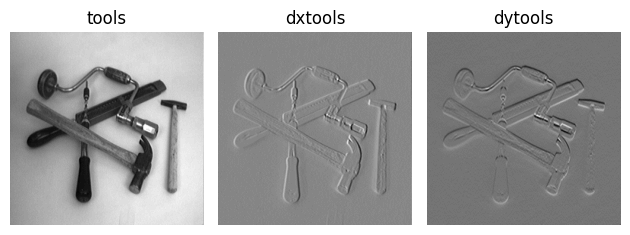

tools' shape:  (256, 256)
dxtools' shape:  (254, 254)
dytools' shape:  (254, 254)


In [32]:
tools = np.load("Images-npy/few256.npy")
dxtools =convolve2d(tools,deltax('central'),'valid')
dytools =convolve2d(tools,deltay('central'),'valid')

f = plt.figure()
f.subplots_adjust(wspace=0.1, hspace=0.2)
a1 = f.add_subplot(1,3, 1)
a1.set_title('tools')
showgrey(tools,False)
a2 = f.add_subplot(1,3, 2)
a2.set_title('dxtools')
showgrey(dxtools,False)
a3 = f.add_subplot(1,3, 3)
a3.set_title('dytools')
showgrey(dytools,False)
f.tight_layout()
plt.show()

#Question 1
print("tools' shape: ",tools.shape)
print("dxtools' shape: ",dxtools.shape)
print("dytools' shape: ",dytools.shape)

## Exercise 2 - Point-wise thresholding of gradient magnitudes

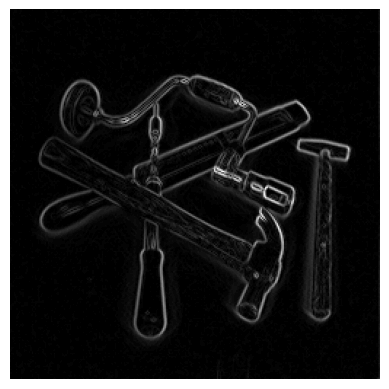

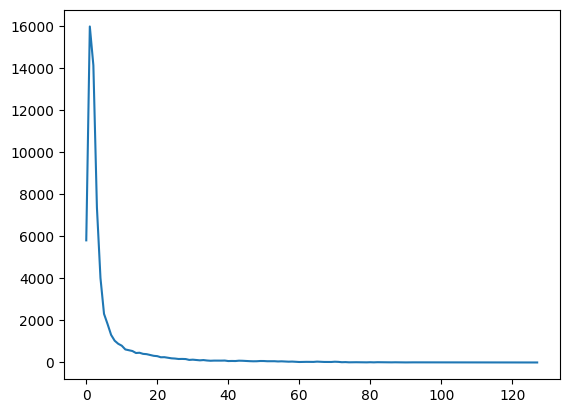

In [33]:
gradmagntools = np.sqrt(dxtools**2 + dytools**2)
showgrey(gradmagntools,False)
plt.show()

hist = np.histogram(gradmagntools, bins=128, range=(0,128))[0]
plt.plot(hist)

In [34]:
def plot_thresholded_magnitude(thresholds,magnitude,subplots_shape,title):
        f = plt.figure()
        f.suptitle(title)
        f.subplots_adjust(wspace=0.1, hspace=0.2)
        a = np.zeros(len(thresholds), dtype=object)
        for i,threshold in enumerate(thresholds):
                a[i] = f.add_subplot(subplots_shape[0],subplots_shape[1], i+1)
                a[i].set_title('threshold: ' + str(threshold))
                showgrey((magnitude > threshold).astype(int),False)
        f.tight_layout()
        plt.show()

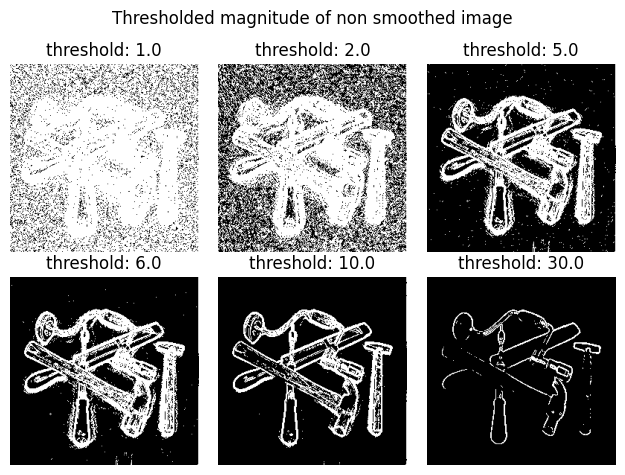

In [35]:
#Question 2
thresholds = [1.0,2.0,5.0,6.0,10.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,gradmagntools,(2,3),"Thresholded magnitude of non smoothed image")

In [36]:
def Lv(inpic, shape = 'same'):
    """ Returns the magnitude of the gradient of an image."""
    Lx = convolve2d(inpic, deltax(), shape) 
    Ly = convolve2d(inpic, deltay(), shape) 
    return np.sqrt(Lx**2 + Ly**2)

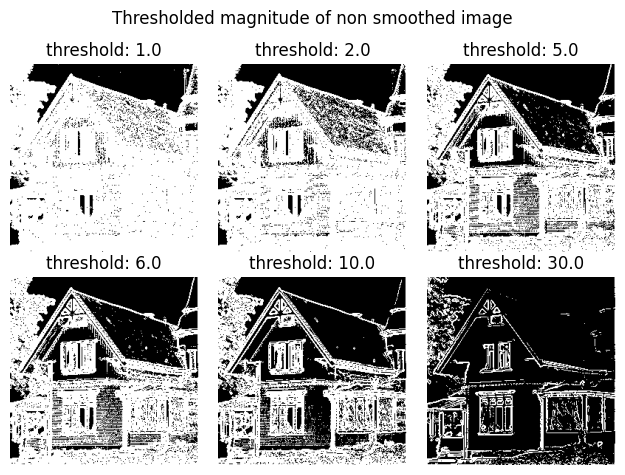

In [8]:
godthem = np.load("Images-npy/godthem256.npy")
godthem_mag = Lv(godthem)
thresholds = [1.0,2.0,5.0,6.0,10.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,godthem_mag,(2,3),"Thresholded magnitude of non smoothed image")


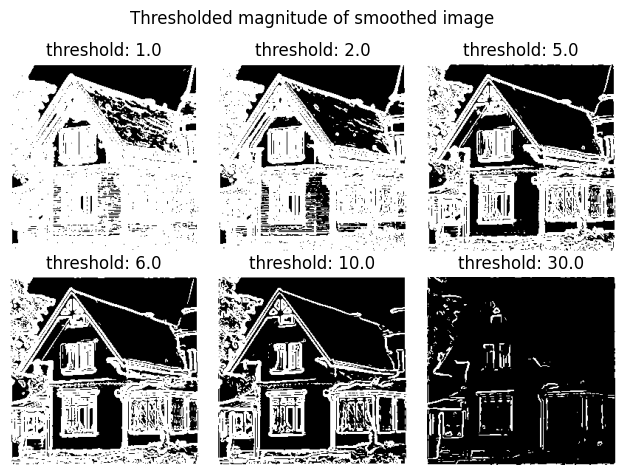

In [9]:
smoothed_godthem = gaussfft(godthem, 1.0)
smoothed_godthem_mag = Lv(smoothed_godthem)
thresholds = [1.0,2.0,5.0,6.0,10.0,30.0] #try with different threshold values
plot_thresholded_magnitude(thresholds,smoothed_godthem_mag,(2,3),"Thresholded magnitude of smoothed image")

## Exercise 4 - Compunting differential geometry descriptors

In [46]:
dx = np.array([0.5,0,-0.5])
dx_2d= np.outer(dx, dx)

# Normalize the filter to make sure it sums to zero
#dx_2d= dx_2d  - np.mean(dx_2d)

#dxx = scipy.signal.convolve2d(dx,dx)
dx_2d

array([[ 0.25,  0.  , -0.25],
       [ 0.  ,  0.  , -0.  ],
       [-0.25, -0.  ,  0.25]])

In [67]:
def Lvvtilde(inpic, shape = 'same'):
        """write a 5x5 np.array with all zeros apart from the 3d row being [0,0.5,0,-0.5,0]"""
        
        dxmask = np.zeros((5, 5))
        dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
        dymask = dxmask.T

        dxxmask = np.zeros((5, 5))
        dxxmask[2, :] = [0, 1, -2, 1, 0]
        dyymask = dxxmask.T

        dxymask = convolve2d(dxmask, dymask)
        #dxxymask = convolve2d(dxxmask, dymask)
        #dxxxmask = convolve2d(dxxmask, dxmask)
        #dxyymask = convolve2d(dxymask, dymask)
        #dyyymask = convolve2d(dyymask, dymask)

        Lx = convolve2d(inpic, dxmask, shape)
        Ly = convolve2d(inpic, dymask, shape)
        Lxx = convolve2d(inpic, dxxmask, shape)
        Lyy = convolve2d(inpic, dyymask, shape)
        Lxy = convolve2d(inpic, dxymask, shape)

        result = Lx**2*Lxx + 2*Lx+Ly*Lxy+Ly**2*Lyy
        return result


def Lvvvtilde(inpic, shape = 'same'):
        dxmask = np.zeros((5, 5))
        dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
        dymask = dxmask.T
        dxxmask = np.zeros((5, 5))
        dxxmask[2, :] = [0, 1, -2, 1, 0]
        dyymask = dxxmask.T

        dxymask = convolve2d(dxmask, dymask)
        dxxymask = convolve2d(dxxmask, dymask)
        dxxxmask = convolve2d(dxxmask, dxmask)
        dxyymask = convolve2d(dxymask, dymask)
        dyyymask = convolve2d(dyymask, dymask)

        Lx = convolve2d(inpic, dxmask, shape)
        Ly = convolve2d(inpic, dymask, shape)
        #Lxx = convolve2d(inpic, dxxmask, shape)
        #Lyy = convolve2d(inpic, dyymask, shape)
        #Lxy = convolve2d(inpic, dxymask, shape)
        Lxxx = convolve2d(inpic, dxxxmask, shape)
        Lxxy = convolve2d(inpic, dxxymask, shape)
        Lxyy = convolve2d(inpic, dxyymask, shape)
        Lyyy = convolve2d(inpic, dyyymask, shape)
        
        result = Lx**3*Lxxx + 3*Lx**2*Ly*Lxxy + 3*Lx*Ly**2*Lxyy + Ly**3*Lyyy
        return result


In [64]:
[x,y] = np.meshgrid(range(-5,6),range(-5,6))

dxmask = np.zeros((5, 5))
dxmask[2, :] = [0, 0.5, 0, -0.5, 0]
dymask = dxmask.T
dxxmask = np.zeros((5, 5))
dxxmask[2, :] = [0, 1, -2, 1, 0]
dyymask = dxxmask.T

dxymask = convolve2d(dxmask, dymask)
dxxymask = convolve2d(dxxmask, dymask)
dxxxmask = convolve2d(dxxmask, dxmask)
dxyymask = convolve2d(dxymask, dymask)
dyyymask = convolve2d(dyymask, dymask)

print(convolve2d(x**3,dxxxmask,'valid'))
print(convolve2d(x**3,dxxmask,'valid'))
print(convolve2d(x**2*y,dxxymask,'valid'))


[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
[[-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]
 [-18. -12.  -6.   0.   6.  12.  18.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [63]:
#check that difference approximations are applied correctly
print(convolve2d(x**2,dxmask,'valid')) #d_x(x^n)=nx^(n-1)
print(convolve2d(x**2,dxxmask,'valid')) #d_x^n(x^n)=n!
print(convolve2d(x**2,dxxxmask,'valid')) #d_x^(n+k)(x^n)=0
print(convolve2d(y**2,dxxxmask,'valid')) #d_x^n(y^k)=0

[[-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]
 [-6. -4. -2.  0.  2.  4.  6.]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


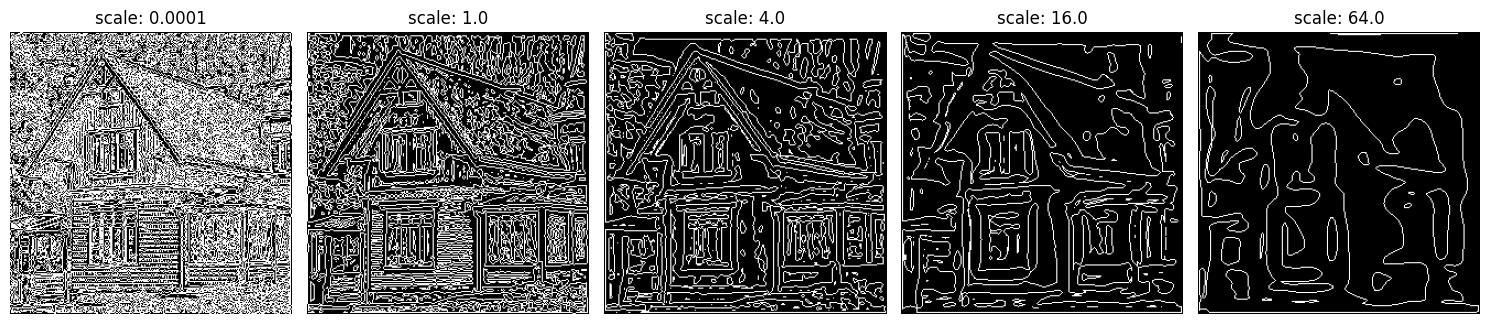

In [72]:
house = np.load("Images-npy/godthem256.npy")

scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(1,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey(contour(Lvvtilde(gaussfft(house, scale),'same')),False)
f.tight_layout()
plt.show()

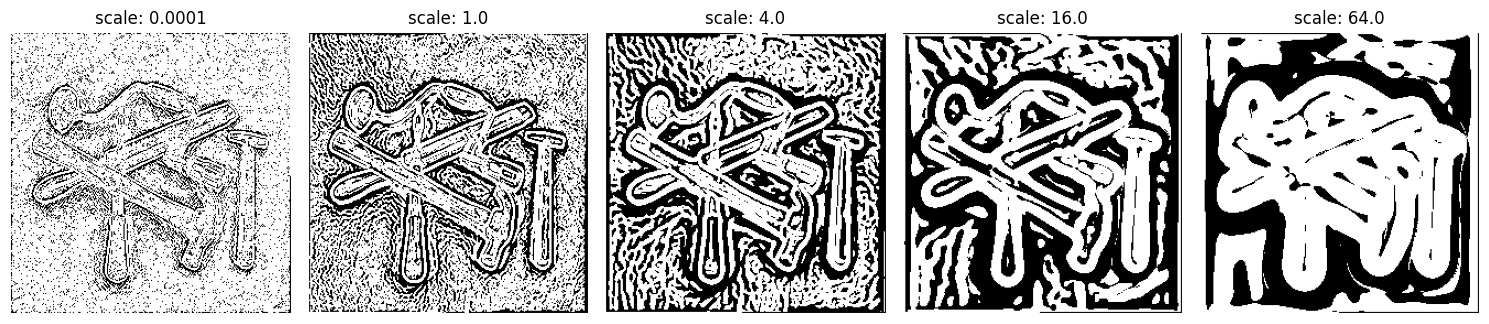

In [74]:
tools = np.load("Images-npy/few256.npy")
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(1,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey((Lvvvtilde(gaussfft(tools, scale),'same')<0).astype(int),False)
f.tight_layout()
plt.show()

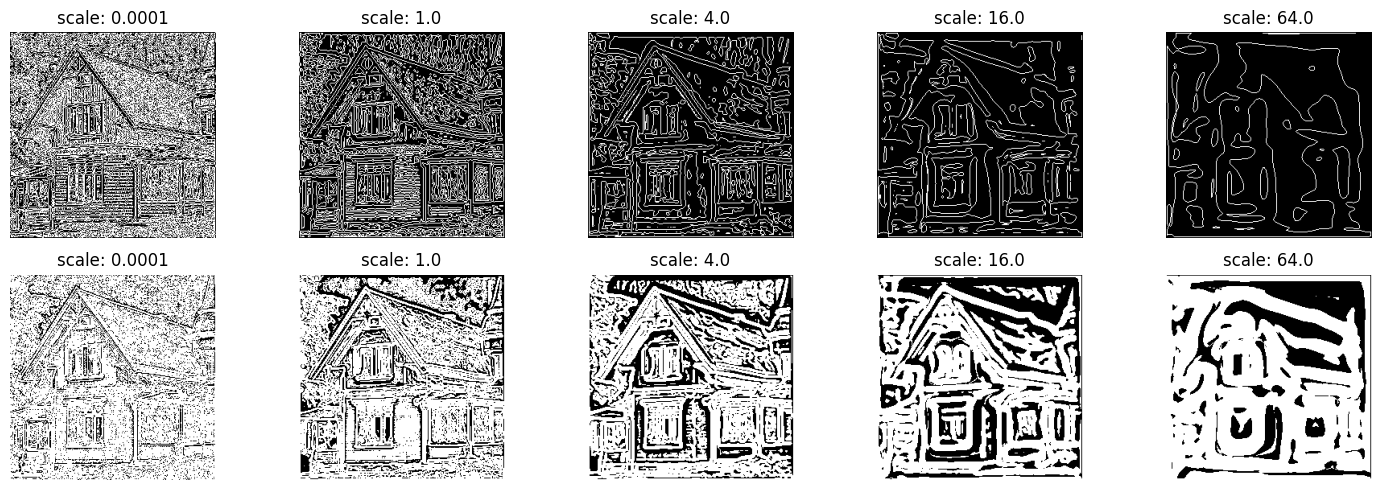

In [109]:
#Question 5
house = np.load("Images-npy/godthem256.npy")

scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
f = plt.figure(figsize=(15,5))

f.subplots_adjust(wspace=0.1, hspace=0.2)
a = np.zeros(len(scales), dtype=object)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(2,5, i+1)
        a[i].set_title('scale: ' + str(scale))
        showgrey(contour(Lvvtilde(gaussfft(house, scale),'same')),False)
for i,scale in enumerate(scales):
        a[i] = f.add_subplot(2,5, i+6)
        a[i].set_title('scale: ' + str(scale))
        showgrey((Lvvvtilde(gaussfft(house, scale),'same')<0).astype(int),False)
f.tight_layout()
plt.show()

## Exercise 5 - Extraction of edge segments

In [94]:
def extractedge(inpic, scale, threshold, shape):
        Lv_result = Lv(gaussfft(inpic, scale), shape) #compute gradient magnitude
        Lvv = Lvvtilde(gaussfft(inpic, scale), shape) #compute approximation of second derivative
        Lvvv = Lvvvtilde(gaussfft(inpic, scale), shape) #compute approximation of third derivative
        Lvvv_mask = Lvvv < 0 #mask out positive values of 3rd derivative
        curves = zerocrosscurves(Lvv,Lvvv_mask) #find zero crossing curves with negative 3rd derivative
        Lvtilde_mask = Lv_result > threshold #mask out values below threshold
        curves = thresholdcurves(curves,Lvtilde_mask) #remove curves whose 1st derivative is below threshold
        overlaycurves(inpic, curves) #overlay curves on image
        return curves

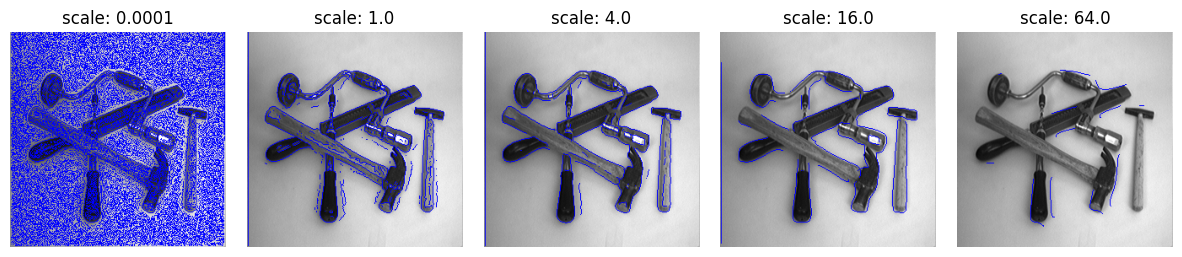

In [98]:
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
threshold = 5.0
f = plt.figure(figsize=(15,5))
f.subplots_adjust(wspace=0.1, hspace=0.2)

for i,scale in enumerate(scales):
        a = f.add_subplot(1,5, i+1)
        a.set_title('scale: ' + str(scale))
        extractedge(tools, scale, threshold, 'same')

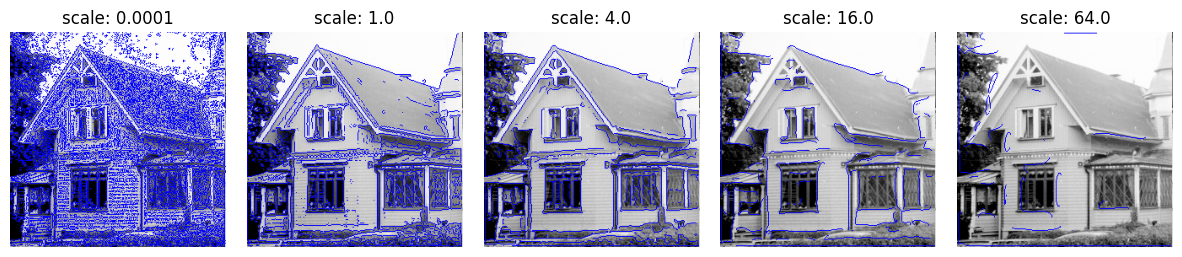

In [103]:
scales = [0.0001, 1.0, 4.0, 16.0, 64.0]
threshold = 3.0
f = plt.figure(figsize=(15,5))
f.subplots_adjust(wspace=0.1, hspace=0.2)

for i,scale in enumerate(scales):
        a = f.add_subplot(1,5, i+1)
        a.set_title('scale: ' + str(scale))
        extractedge(house, scale, threshold, 'same')

(array([  1,   1,   1, ..., 254, 254, 254]),
 array([  2,   3,  11, ..., 252, 253, 254]))

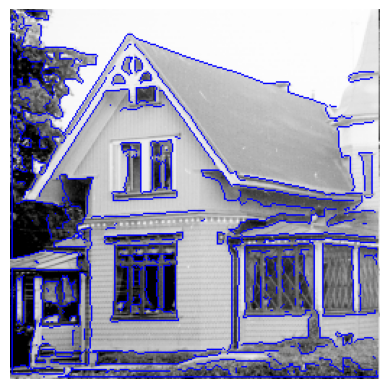

In [102]:
#Question 7 (tuna i parametri)
scale  =4.0
threshold = 5.0
extractedge(house, scale, threshold, 'same')
#scale  =4.0
#threshold = 5.0
extractedge(tools, scale, threshold, 'same')

## Exercise 6 - Hough Transform

In [ ]:
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines = 20, verbose = False):
        # ...
        return linepar, acc

def houghedgeline(pic, scale, gradmagnthreshold, nrho, ntheta, nlines = 20, verbose = False):
        # ...
        return linepar, acc